# K-Means Clustering

Clustering is an unsupervised learning technique that finds structure in unlabeled data by identifying similar groups. The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:

-    How many groups do we choose?
-    How do we define similarity?

In K-Means:

-    The “K” refers to the number of clusters we expect to find in a dataset.
-    The “Means” refers to the average distance of data to each cluster center(centroid), which we are trying to minimize.

It is an iterative approach:

1.    Place k random centroids for the initial clusters.
2.    Assign data samples to the nearest centroid.
3.    Update centroids based on the above-assigned data samples.

Repeat Steps 2 and 3 until convergence (when points don’t move between clusters and centroids stabilize).

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster.

## Visualize Before K-Means

We will work with Iris dataset which consists of measurements of sepals and petals of 3 different plant species:

-    Iris setosa
-    Iris versicolor
-    Iris virginica


The features of the dataset are:

-    Column 0: Sepal length
-    Column 1: Sepal width
-    Column 2: Petal length
-    Column 3: Petal width

The 3 species of Iris plants are what we are going to cluster later.

Below we create a 2D scatter plot of the Iris dataset using two of its features (sepal length vs. Sepal width). The sepal length measurements are stored in column 0 of the matrix, and the Sepal width measurements are stored in column 1 of the matrix.

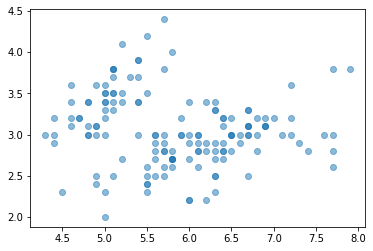

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

plt.scatter(x, y, alpha = 0.5)

plt.show()

## Implementing K-Means

-   Place k random centroids for the initial clusters
-   Assign data samples to the nearest centroid.
-   Update centroids based on the above-assigned data samples.

Repeat Steps 2 and 3 until convergence.

## Step 1: Place k random centroids for the initial clusters


Because we expect there to be three clusters for the three species of flowers, we implement K-Means where the k is 3.

We will create three random initial centroids and plot them along with our samples.

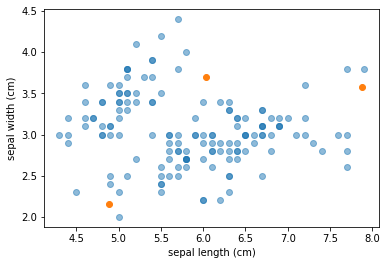

In [2]:
combined = np.array(list(zip(x, y)))

# Step 1: Place K random centroids
k = 3
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

##  Step 2: Assign data samples to the nearest centroid

Now we have the three random centroids. We'll assign data points to their nearest centroids. To do this we write a distance() function. Then, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids.

In [3]:
# Distance formula between two points
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

We'll create an array called labels that will hold the cluster labels for each data point. Its size should be the length of the data sample.

In [4]:
# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

We'll create an array called distances that will hold the distances for each centroid. It should have the size of k.

In [5]:
# Distances to each centroid
distances = np.zeros(k)

To assign each data point to the closest centroid, we need to iterate through the whole data sample and calculate each data point’s distance to each centroid.

We can get the index of the smallest distance of distances by doing:

cluster = np.argmin(distances)

Then, we assign the cluster to each index of the labels array.


In [6]:
# Assign to the closest centroid

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster


## Step 3: Update centroids based on the above-assigned data samples

We will update the centroids by finding new cluster centers by taking average of the assigned points. We save the old centroids value before updating.

In [7]:
from copy import deepcopy

centroids_old = deepcopy(centroids)

Then, we create a for loop that iterates k times.

Since k = 3, as we are iterating through the for loop each time, we can calculate the mean of the points that have the same cluster label.

Inside the for loop, we create an array named points where we get all the data points that have the cluster label i.

Then, calculate the mean of those points to get the new centroid.

Store the new centroid in centroids[i].

In [8]:
for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis=0)

## Step 4: Repeat Steps 2 and 3 until convergence.

This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).

We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the while loop, we need to create an array named errors. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in errors are 0.

In [9]:
# Initialize error:
error = np.zeros(3)

error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

In [10]:
while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    distances[0] = distance(sepal_length_width[i], centroids[0])
    distances[1] = distance(sepal_length_width[i], centroids[1])
    distances[2] = distance(sepal_length_width[i], centroids[2])
    cluster = np.argmin(distances)
    labels[i] = cluster

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(3):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

  error[0] = distance(centroids[0], centroids_old[0])
  error[1] = distance(centroids[1],   centroids_old[1])
  error[2] = distance(centroids[2], centroids_old[2])

Now we visualize all the points in each of the labels with a different color. We create a for loop that iterates k times and inside it, we create an array named points where we get all the data points that have the cluster label i. Then we make a scatter plot of points[:, 0] vs points[:, 1]

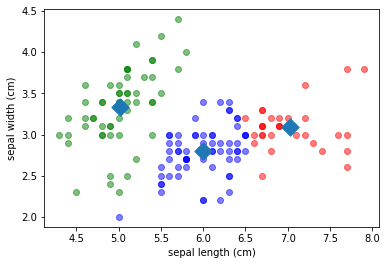

In [11]:
colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()